## Check multithreading configuration:

In [94]:
Base.Threads.nthreads()

4

## Charge required packages 
The following line will charge the required packages
If you need to install packages you can simply run in new cell: 
using Pkg
Pkg.add("PackageName")

In [2]:
using BenchmarkTools, Plots, HDF5, LsqFit, CSV, DataFrames, RadiationDetectorSignals, Unitful, UnitfulAtomic, Noise, Distributions, StatsBase, LinearAlgebra, RadiationSpectra

In [3]:
M = rand(2^3, 2^3)
@btime $M * $M;

  320.476 ns (1 allocation: 576 bytes)


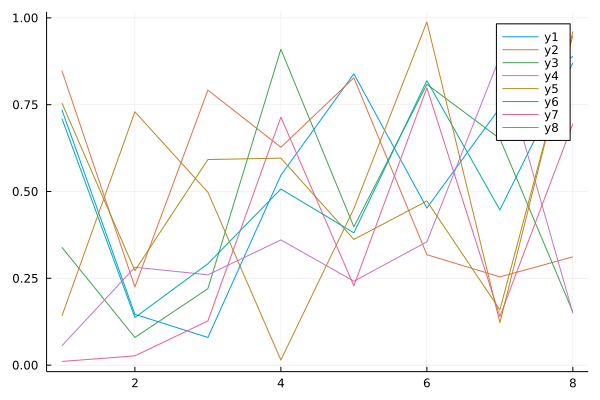

In [4]:
plot(M)

## Reading hdf files containing the data 

In [99]:
readdir("../")

56-element Vector{String}:
 "Acquisition Software"
 "ChangeLog.txt"
 "Drivers"
 "Examples"
 "Firmware"
 "Library"
 "Manuals"
 "Waveform.hdf"
 "Waveform_1024.hdf"
 "Waveform_1024_run2.hdf"
 "Waveform_1996.hdf"
 "Waveform_32.hdf"
 "Waveform_diagnostic_1.hdf"
 ⋮
 "Waveformsamba1996_7.hdf"
 "Waveformsamba1996_8.hdf"
 "Waveformsamba1996_9.hdf"
 "config.png"
 "config.xml.bkp"
 "configV4EM.xml"
 "configV4EM_template.xml"
 "mth-descher.pdf"
 "setting.png"
 "tmp56B0.tmp"
 "tmpAFF0.tmp"
 "waveform_mode_DANTE"

In [6]:
dante_file = "../Waveformsamba1996_7.hdf"

"../Waveformsamba1996_7.hdf"

In [7]:
h5_file = h5open(dante_file,"r")

🗂️ HDF5.File: (read-only) ../Waveformsamba1996_7.hdf
├─ 🔢 ChannelID
├─ 📂 Configuration
│  ├─ 🔢 Baseline_Samples
│  ├─ 🔢 Calibration_BinPoints
│  ├─ 🔢 Calibration_EnergyPoints
│  ├─ 🔢 Calibration_Equation
│  ├─ 🔢 Calibration_nBins
│  ├─ 🔢 Decimation_Ratio
│  ├─ 🔢 EnergyFilter_FlatTop
│  ├─ 🔢 EnergyFilter_MaxPeakTime
│  ├─ 🔢 EnergyFilter_PeakTime
│  ├─ 🔢 EnergyFilter_Th
│  ├─ 🔢 Energy_Baseline_Threshold
│  ├─ 🔢 Exponential_Offset
│  ├─ 🔢 Exponential_TimeConstant
│  ├─ 🔢 FastFilter_FlatTop
│  ├─ 🔢 FastFilter_PeakTime
│  ├─ 🔢 FastFilter_Th
│  ├─ 🔢 Gain
│  ├─ 🔢 GatingMode
│  ├─ 🔢 InputInverted
│  ├─ 🔢 InputMode
│  ├─ 🔢 Input_Offset1
│  ├─ 🔢 Input_Offset2
│  ├─ 🔢 MaxRiseTime
│  ├─ 🔢 Recovery_Time
│  ├─ 🔢 Reset_Th
│  └─ (3 more children)
├─ 🔢 CreatedDateTime
├─ 🔢 DLLVersion
├─ 🔢 FileStructureVersion
├─ 🔢 Firmware
├─ 📂 Listmode
│  ├─ 🔢 Energies
│  └─ 🔢 Timestamps
├─ 🔢 SoftwareVersion
├─ 📂 Spectra
│  ├─ 📂 ROIs
│  └─ 🔢 Spectra
├─ 📂 Statistics
│  ├─ 🔢 BaselineValue
│  ├─ 🔢 DeadTime
│  ├─ 🔢 Detect

In [8]:
obj = h5_file["Waveform"]
metadata = read(obj)
data = metadata["Waves"]
Int.(data)

32702464×8 Matrix{Int64}:
 23090  22354  24615  26630  23313  21858  22217  21516
 23089  22351  24614  26633  23317  21858  22217  21519
 23089  22352  24614  26634  23315  21856  22216  21516
 23089  22351  24618  26632  23308  21854  22216  21515
 23092  22352  24618  26632  23306  21855  22218  21515
 23093  22354  24617  26631  23310  21854  22214  21517
 23090  22351  24617  26633  23309  21854  22211  21516
 23095  22350  24620  26633  23309  21857  22213  21512
 23090  22351  24616  26638  23306  21855  22213  21511
 23093  22350  24617  26636  23308  21855  22211  21513
 23093  22351  24614  26637  23308  21854  22211  21509
 23093  22352  24614  26637  23305  21858  22218  21509
 23090  22351  24612  26632  23309  21859  22215  21510
     ⋮                                  ⋮         
 24743  21714  26029  30173  21632  23922  25326  23358
 24745  21710  26028  30173  21636  23920  25326  23361
 24747  21712  26029  30173  21633  23927  25325  23359
 24747  21714  26026  30177

## Function to get data from hdf file 
In the following we can automate the task of retrieving the data using a function

Then we can just use my_data = get_DANTE_data("my_file_name")

In [9]:
function get_DANTE_data(file_name::String)
    h5_file = h5open(file_name,"r")
    obj = h5_file["Waveform"]
    metadata = read(obj)
    data = metadata["Waves"]
    return Int.(data)
end

get_DANTE_data (generic function with 1 method)

In [10]:
data_dante = get_DANTE_data(dante_file) 

32702464×8 Matrix{Int64}:
 23090  22354  24615  26630  23313  21858  22217  21516
 23089  22351  24614  26633  23317  21858  22217  21519
 23089  22352  24614  26634  23315  21856  22216  21516
 23089  22351  24618  26632  23308  21854  22216  21515
 23092  22352  24618  26632  23306  21855  22218  21515
 23093  22354  24617  26631  23310  21854  22214  21517
 23090  22351  24617  26633  23309  21854  22211  21516
 23095  22350  24620  26633  23309  21857  22213  21512
 23090  22351  24616  26638  23306  21855  22213  21511
 23093  22350  24617  26636  23308  21855  22211  21513
 23093  22351  24614  26637  23308  21854  22211  21509
 23093  22352  24614  26637  23305  21858  22218  21509
 23090  22351  24612  26632  23309  21859  22215  21510
     ⋮                                  ⋮         
 24743  21714  26029  30173  21632  23922  25326  23358
 24745  21710  26028  30173  21636  23920  25326  23361
 24747  21712  26029  30173  21633  23927  25325  23359
 24747  21714  26026  30177

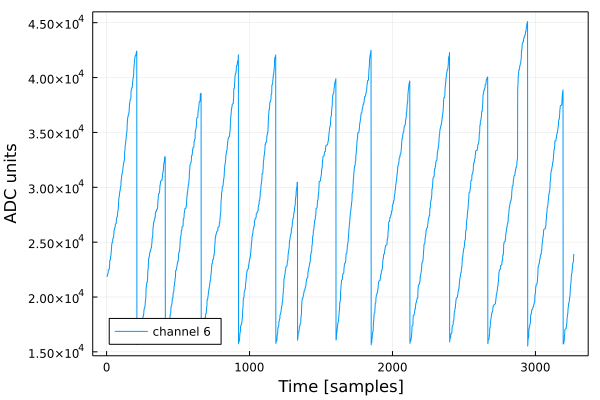

In [11]:
#Let's choose some channel for the next steps 
my_channel = 6
data_my_channel = data_dante[1:end,my_channel]
#Now we plot the data of this channel, we take points each 10000 samples 1:10000:end
plot(data_my_channel[1:10000:end],xlabel="Time [samples]",ylabel="ADC units", label="channel $(my_channel)",legend=:bottomleft,framestyle = :box)

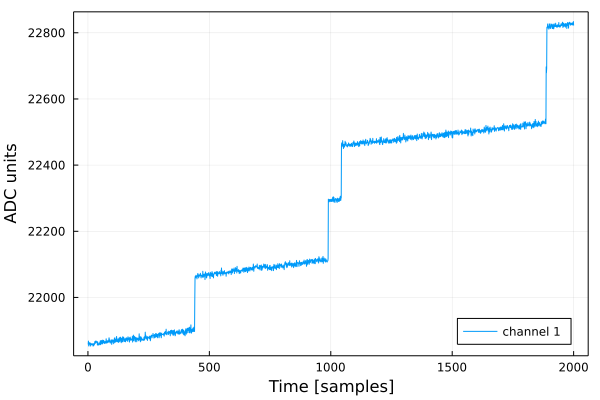

In [12]:
#Let's see the first 200000 samples
plot(data_my_channel[1:100:200000],xlabel="Time [samples]",ylabel="ADC units", label="channel 1",legend=:bottomright,framestyle = :box)

## Identifying the reset points
Before continuing with the analysis we need to identify the reset points so we can cut in sections the waveforms

We define a get_restart_wf function to this end

In [13]:
function get_restart_wf(wf::Vector{Int64},step_down::Int=100)
    positions = Int[]
    locations = Int[]
    for i=2:1:length(wf)
        if (wf[i] + step_down) < wf[i-1]
            push!(locations,i)
        end
    end
    push!(positions,locations[1])
    for i=2:1:length(locations)
        if locations[i] - locations[i-1] > 500
            push!(positions,locations[i])
        end
    end
    return positions
end

get_restart_wf (generic function with 2 methods)

In [14]:
reset_points = get_restart_wf(data_my_channel,100)

15-element Vector{Int64}:
  2103868
  4096458
  6606041
  9211289
 11824892
 13343811
 16033831
 18495566
 21204018
 23983980
 26657860
 28747588
 29441196
 31926539
 32702464

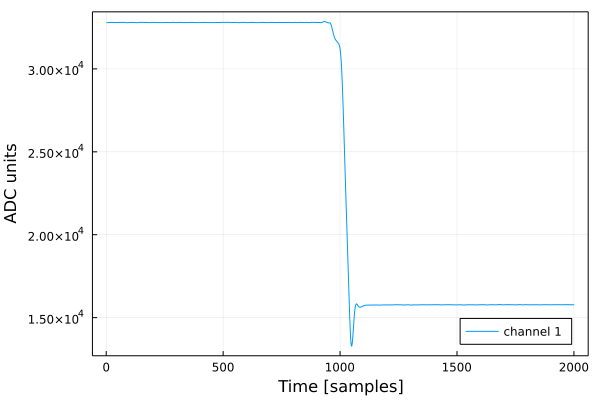

In [15]:
#Now let's look around the reset points
plot(data_my_channel[reset_points[2]-1000:reset_points[2]+1000],xlabel="Time [samples]",ylabel="ADC units", label="channel 1",legend=:bottomright,framestyle = :box)

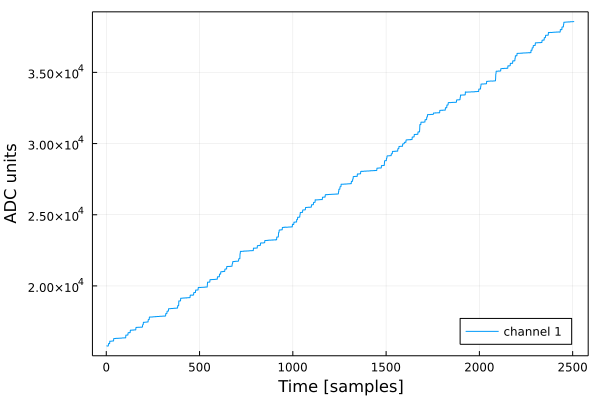

In [16]:
#Now let's plot between two reset points
plot(data_my_channel[reset_points[2]+1000:1000:reset_points[3]-1000],xlabel="Time [samples]",ylabel="ADC units", label="channel 1",legend=:bottomright,framestyle = :box)

## Leakage current correction 
-If look to small sections of the waveform it seems like we have an slope 

- What's the origin? 

-How to correct that? 

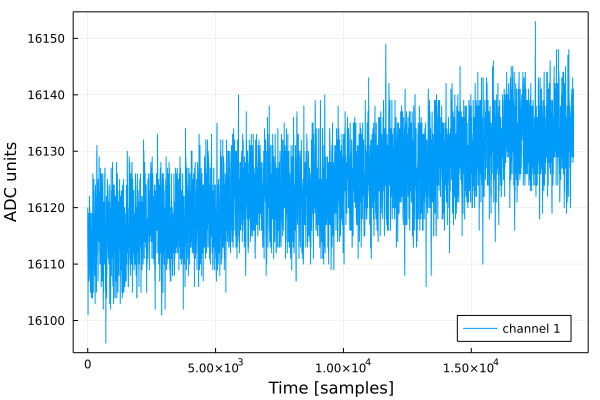

In [17]:
plot(data_my_channel[reset_points[2]+19000:reset_points[2]+38000],xlabel="Time [samples]",ylabel="ADC units", label="channel 1",legend=:bottomright,framestyle = :box)

In [18]:
#Let's fit with a linear function and find the slope to make the correction 
#We use the previous section 
data_section_lc = data_my_channel[reset_points[2]+19000:reset_points[2]+38000]
#now let's define a linear model
model_lc(t, p) = t*p[1] .+ p[2]
p0 = [0.01,data_section_lc[1]]

2-element Vector{Float64}:
     0.01
 16120.0

In [19]:
xdata = collect(1:1:length(data_section_lc));

In [20]:
myfit = curve_fit(model_lc, xdata, data_section_lc, p0)

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Int64}}([0.001035604853899876, 16114.464491768636], [-5.534472626510251, 0.46656297834488214, 1.4675985831981961, -3.53136581194849, -1.5303302070933569, -4.529294602240043, 2.471741002613271, 3.472776607468404, 3.473812212321718, 1.474847817175032  …  -6.867300846097351, -4.866265241244037, 0.1347703636110964, -3.8641940315355896, -1.8631584266822756, 5.137877178172857, 1.1389127830261714, -0.8600516121205146, -0.8590160072653816, -2.8579804024120676], [1.000000062800075 0.9999999999972128; 1.9999999754058564 0.9999999999972128; … ; 19000.000000057957 0.9999999999972128; 19000.99999997056 0.9999999999972128], true, Int64[])

In [21]:
myfit.param

2-element Vector{Float64}:
     0.001035604853899876
 16114.464491768636

In [47]:
##Slopes founded previously for all 8 channels
slope_lc_samba = [0.000988; 0.0016189; 0.00114756; 0.00103988; 0.0007817; 0.000923; 0.0007636487; 0.00072786];
channel_mapping = [26,31,32,33,15,10,16,22] #to have the pixel number instead of the DANTE channel number 

8-element Vector{Int64}:
 26
 31
 32
 33
 15
 10
 16
 22

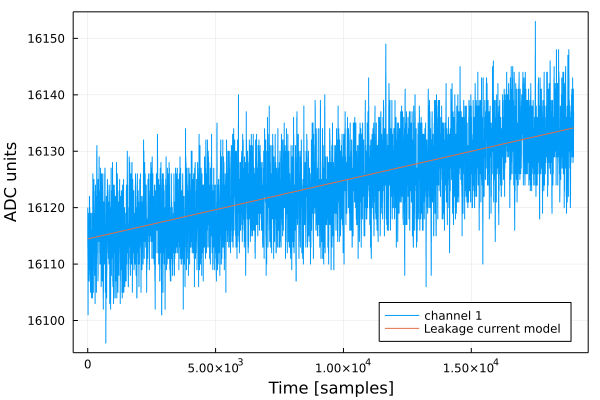

In [22]:
f_lc(x) = myfit.param[2] + x * myfit.param[1]
plot!(f_lc, 1, length(xdata), label= "Leakage current model")

In [23]:
#Now let's declare a function to correct the leakge current using the slop found with the fit
function correct_leakage_current(wf::Vector{<:Integer}, slope::Float64)
    new_signal = Vector{AbstractFloat}(undef, length(wf))
    new_signal[1] = wf[1]
    for i =2:1:length(wf)
        new_signal[i] =  wf[i] - i * slope
    end
    return new_signal
end

correct_leakage_current (generic function with 1 method)

In [24]:
wf_lc_corrected = correct_leakage_current(data_section_lc,myfit.param[1]);

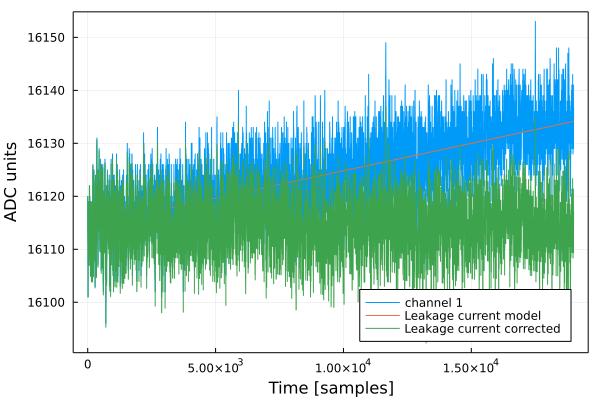

In [25]:
plot!(wf_lc_corrected,label= "Leakage current corrected")

## Fitering the data and finding individual events in the waveform
-Now that our waveform has been corrected for the leakge current we can find the individual events

-We will use a trapezoidal filter + the RadiationSpectra class to idetify the steps

In [26]:
function trap_norm(w_in::Vector, rise_int::Int, flat_int::Int, output::Bool = false)
    n_samples = length(w_in)
    if 2 * rise_int + flat_int > n_samples
        println("FATAL ERROR: 2*rise + flat > waveform length. Filter must be shorter than waveform.")
    end
    window = trunc(Int, n_samples/5)
    r1 = 1 : window
    r2 = n_samples - 30 : n_samples
    w_out = Vector(undef, n_samples)
    w_out[1] = w_in[1]/rise_int
    for i =2:1:rise_int
        w_out[i] = w_out[i-1] + w_in[i]/rise_int
    end
    for i =rise_int+1:1:rise_int + flat_int
        w_out[i] = w_out[i-1] + (w_in[i] - w_in[i-rise_int])/rise_int
    end
    for i =rise_int + flat_int + 1 :1: 2 * rise_int + flat_int
        w_out[i] = w_out[i-1] + (w_in[i] - w_in[i-rise_int] - w_in[i-rise_int-flat_int])/rise_int
    end
    for i =2 * rise_int + flat_int + 1:1:n_samples
        w_out[i] = w_out[i-1] + (w_in[i] - w_in[i-rise_int] - w_in[i-rise_int-flat_int] + w_in[i-2*rise_int-flat_int])/rise_int
    end
    if output == false
        return mean(w_out[r2]) - mean(w_out[r1])
    else
        return w_out
    end
end

trap_norm (generic function with 2 methods)

In [27]:
data_between_resets = data_my_channel[reset_points[2]+1000:reset_points[3]-1000]
data_between_resets_LC_corrected = correct_leakage_current(data_between_resets,myfit.param[1]);
data_between_resets_baseline = data_between_resets.-mean(data_between_resets_LC_corrected[1:100])
trap_data = trap_norm(data_between_resets_baseline,15,3,true)

2507584-element Vector{Any}:
 -0.010514154062548187
 -0.08769497479176304
 -0.1648757955209779
 -0.44205661625019277
 -0.7192374369794077
 -0.8630849243752892
 -0.940265745104504
 -1.0174465658337188
 -1.227960719896267
 -1.4384748739588151
 -1.6489890280213633
 -1.8595031820839114
 -1.603350669479793
  ⋮
 -6.13333333333227
 -3.9999999999989364
 -1.9999999999989364
 -0.06666666666560306
  2.000000000001064
  3.7333333333343974
  5.733333333334397
  7.333333333334398
  8.666666666667732
  9.333333333334398
 10.000000000001064
 10.333333333334398

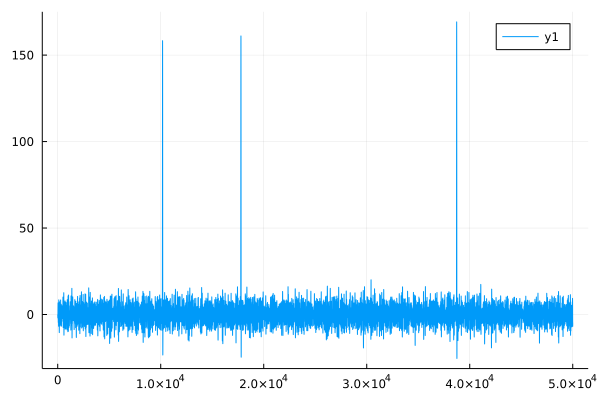

In [28]:
#Let's see how looks like the trap filter data
plot(trap_data[1:50000])

In [29]:
#Now we find the position of the events using the RadiationSpectra package
peak_wf, pos_peaks = RadiationSpectra.peakfinder(trap_data,threshold=30.,markov=false)

([0.24818345986984694, 0.2692354452809339, 0.24648751568518032, 0.18595794482547462, 0.12669370717591744, 0.09441109657226254, 0.08627036041317478, 0.08376930529366346, 0.07202422672188881, 0.06071288299561429  …  1.3739150233603379, 2.8692947046128197, 4.811325324578904, 6.792878508954768, 8.423339815528747, 9.53113139218339, 10.160017483119715, 10.423006338972966, 10.327101754606282, 9.819884292218603], [2.0055790005704644e6, 103664.00278532255, 1.8244450009479127e6, 644759.9987421407, 397766.99686275434, 2.3683229971465124e6, 715450.997720539, 1.9239979978357353e6, 1.0195049983821214e6, 2.0884879958216483e6  …  387382.99489782355, 1.7201230035826275e6, 1.1570630035451017e6, 787840.9986241003, 1.3224659964168228e6, 541808.0014130722, 612515.9988151209, 1.5266260008176686e6, 1.5962370027593654e6, 1.7520910001016764e6])

In [30]:
#Let's order of the position, we use trunc since we only want the int
my_peaks = sort(trunc.(Int, pos_peaks))

126-element Vector{Int64}:
   10177
   17786
   38730
  103664
  115842
  127099
  157392
  193566
  197781
  223140
  229462
  317486
  324095
       ⋮
 2275551
 2281046
 2287717
 2298477
 2334112
 2346689
 2353945
 2368322
 2432922
 2441642
 2449196
 2451302

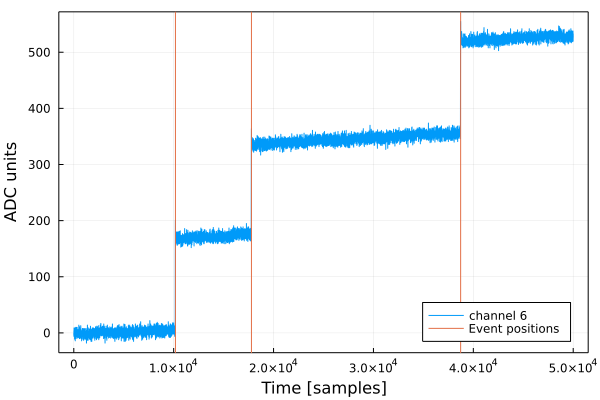

In [31]:
#Let's see if it worked 
plot(data_between_resets_baseline[1:50000],xlabel="Time [samples]",ylabel="ADC units", label="channel $(my_channel)",legend=:bottomright,framestyle = :box)
vline!(my_peaks[1:3],label="Event positions")

In [32]:
function get_Event_positions(wf::Vector{AbstractFloat},trap_rise::Int = 5, trap_flat::Int = 3,peak_threshold = 6.)
    myvector_baseline = wf[1:end-1].- mean(wf[1:10])
    trap_data = trap_norm(myvector_baseline,trap_rise,trap_flat,true)
    peak_wf, pos_peaks = RadiationSpectra.peakfinder(trap_data, threshold=peak_threshold, markov=false)
    return sort(trunc.(Int, pos_peaks))
end

get_Event_positions (generic function with 4 methods)

In [33]:
function get_Event_positions(wf::Vector{Integer},trap_rise::Int = 5, trap_flat::Int = 3,peak_threshold = 6.)
    myvector_baseline = wf[1:end-1].- mean(wf[1:10])
    trap_data = trap_norm(myvector_baseline,trap_rise,trap_flat,true)
    peak_wf, pos_peaks = RadiationSpectra.peakfinder(trap_data, threshold=peak_threshold, markov=false)
    return sort(trunc.(Int, pos_peaks))
end

get_Event_positions (generic function with 8 methods)

## Energy reconstruction of individual events 

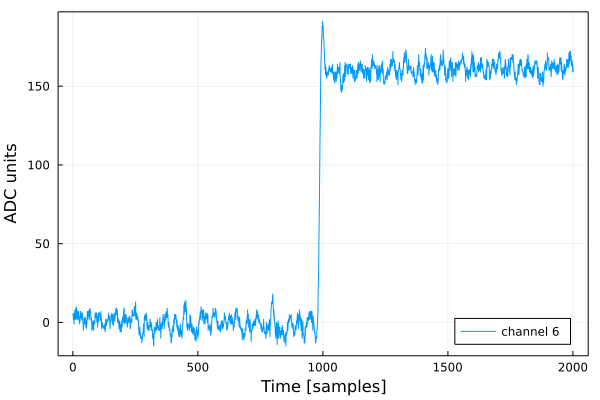

In [34]:
#Let's select an event
evt_number = 5
window = 1000
data_my_event = data_between_resets_baseline[my_peaks[evt_number]-window:my_peaks[evt_number]+window]
data_my_event_baseline = data_my_event .- mean(data_my_event[1:500])
plot(data_my_event_baseline,xlabel="Time [samples]",ylabel="ADC units", label="channel $(my_channel)",legend=:bottomright,framestyle = :box)

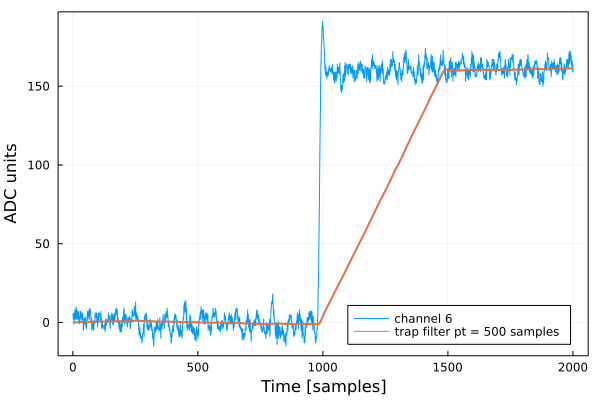

In [35]:
#Now let's use our trap filter to reconstruct the energy of this event
wf_evt_trap = trap_norm(data_my_event_baseline,500,1000,true)
plot!(wf_evt_trap,lw=2,label="trap filter pt = 500 samples")

In [36]:
Energy = trap_norm(data_my_event_baseline,500,1000,false)

160.6428670322572

In [43]:
"""
    get_rising_time(wvs::AbstractVector,wf_starts_at = 0.10,wf_ends_at = 0.90) 
Accepts a vector containing a waveform and return the rising time 
A low and high level can be given as input 
The default corresponds to 10 to 90 % of the maximum of the waveform 
"""
function get_rising_time(wvs::AbstractVector,wf_starts_at = 0.10,wf_ends_at = 0.90)
    wf_Max = wvs[argmax(wvs)]
    wf_Min = wvs[argmin(wvs)]
    polarity::Int = 0
    
    ## check polarity of waveform
    if abs(wf_Max) > abs(wf_Min)
        polarity = 1
        wf_Max_pc_low = (wf_Max - wf_Min) * wf_starts_at * polarity + wf_Min
        wf_Max_pc_high = (wf_Max - wf_Min) * wf_ends_at * polarity + wf_Min
    else
        polarity = -1
        wf_Max_pc_low = -1 * ( (wf_Min - wf_Max) * wf_starts_at * polarity - wf_Max)
        wf_Max_pc_high = -1 * ( (wf_Min - wf_Max) * wf_ends_at * polarity - wf_Max )
    end
    
    ## make sure waveform is inverted if polarity is negative
    wf_abs = wvs * polarity
    
    rising_starts = -99
    rising_ends = -99
    i_pc_low = 1
    
    ## find low % position in the waveform
    for i=1:length(wf_abs)
        if wf_abs[i] > wf_Max_pc_low
            rising_starts = i
            i_pc_low = i
            break
        end
    end
    
    ## find high % position in the waveform
    ## start searching after low % position to gain in performance
    for i=i_pc_low:length(wf_abs)
        if wf_abs[i] > wf_Max_pc_high
            rising_ends = i
            break
        end
    end
    ## return the rising time in samples defined as the time required to go from 5% to  95% of the maximum value in the waveform
    return rising_time = rising_ends - rising_starts
end

get_rising_time

In [44]:
"""
     median_filter(data::Vector, filter_size::Int)
Function to perform a median filter, it gets a vector and waveform and returns a new waveform
filtered using the median filter
It accepts a vector and the size of a window
"""
function median_filter(data::Vector, filter_size::Int)
    temp = zeros(filter_size)
    indexer = filter_size ÷ 2
    data_final = zeros(length(data))
    for i =1:1:length(data)
        for z =1:1:filter_size
            if i + z - indexer < 1
                temp[z]=mean(data[i:i+indexer])
            elseif i + z - indexer > length(data)
                temp[z]=data_final[i-1]
            else
                temp[z]=data[i + z - indexer]
            end
        end
        data_final[i] = median(temp)
    end
    return data_final
end

median_filter

In [45]:
function process_file(n_file::String,ch_number::Int,ch_reference::Int,peaking_time::Int)
    dante_data = get_DANTE_data(n_file);
    channel_data = dante_data[:,ch_reference]
    wf_pos = get_restart_wf(channel_data,150)
    channel_data = dante_data[:,ch_number]
    Energy = []
    T_rising = []
    for i=1:1:length(wf_pos)
        if i == 1
            wf_start = 1000
            wf_end = wf_pos[i] - 1000
        else
            wf_start = wf_pos[i-1] + 1000
            wf_end = wf_pos[i] - 1000
        end
        if wf_end - wf_start < 5000
            continue
        end
        wf_long = channel_data[wf_start:wf_end]
        wf_long_new = correct_leakage_current(wf_long,myfit.param[1])
        peaks = get_Event_positions(wf_long_new,15,3,40.)
        if length(peaks) < 6
            continue
        end
        #println("break here "," length: ",length(peaks))
        for evt=3:1:length(peaks)-1
            dist_first_evt = peaks[evt] - peaks[evt-1]
            dist_second_evt = peaks[evt+1] - peaks[evt]
            rise_time = 10 #in samples
            flat_section = dist_second_evt - rise_time
            if dist_first_evt <= 1000 || dist_second_evt <= 1000
                continue
            else 
                wf_evt = wf_long[peaks[evt]-1000:peaks[evt]+1000]
                wf_baseline = wf_evt .- mean(wf_evt[1:100])
                energy_evt = trap_norm(wf_baseline,peaking_time,1000,false)
                wf_evt_filter = median_filter(wf_baseline,200)
                t_rising = get_rising_time(wf_evt_filter,0.10,0.90)
                push!(Energy,energy_evt)
                push!(T_rising,t_rising)
            end
        end
    end
    return [Energy T_rising]
end

process_file (generic function with 1 method)

In [48]:
events_variables = process_file(dante_file,6,6,500)

1260×2 Matrix{Real}:
 164.24   14
 166.641  11
 165.201  11
 165.008  11
 163.397  10
 162.622  13
 163.729  11
 182.923  10
 161.799  10
 165.391  12
 162.88   10
 166.865  11
 163.061  10
   ⋮      
 180.701  11
 165.411  15
 163.98   11
 165.705  13
 166.412  12
 161.281  11
 179.835   9
 167.024  13
 162.684  10
 164.721  12
 167.603  11
 163.107  12

In [49]:
h_E_ADC = fit(Histogram, events_variables[:,1],1:1:500)

Histogram{Int64, 1, Tuple{StepRange{Int64, Int64}}}
edges:
  1:1:500
weights: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
closed: left
isdensity: false

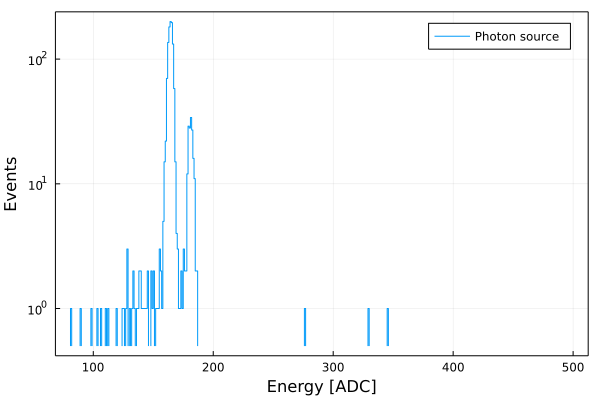

In [53]:
plot()
plot!(h_E_ADC,label="Photon source",st=:step,framestyle = :box,xlabel="Energy [ADC]",ylabel="Events",legend=:topright,yaxis=:log)

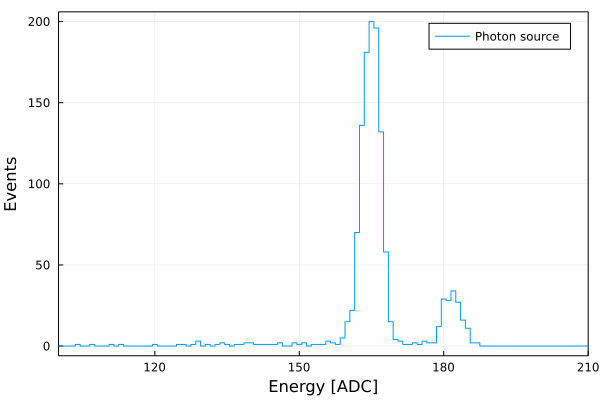

In [76]:
observed_counts = h_E_ADC.weights
bin_edges = h_E_ADC.edges[1]
bin_edges_left = bin_edges[1:end-1]
bin_edges_right = bin_edges[2:end]
bin_widths = bin_edges_right - bin_edges_left
bin_centers = (bin_edges_right + bin_edges_left) / 2
y_error = sqrt.(observed_counts)
plot(bin_centers,observed_counts,xlims=(100,210),label="Photon source",st=:step,framestyle = :box,xlabel="Energy [ADC]",ylabel="Events",legend=:topright)

In [71]:
findmax(observed_counts)

(200, 164)

In [72]:
@. model(x, p) = p[1] * exp(-0.5*((x-p[2])^ 2)/(p[3]^ 2) ) + p[4] * exp(-0.5*((x-p[5])^ 2)/(p[6]^ 2) )
μ1_guess = bin_centers[findmax(observed_counts)[2]]
A1_guess = findmax(observed_counts)[1]
μ2_guess = μ1_guess * (6.45/5.89)
A2_guess = A1_guess/5
σ1_guess = 5.
σ2_guess = 5.

p0 = [A1_guess,μ1_guess,σ1_guess,A2_guess,μ2_guess,σ2_guess]
myfit_calibration = curve_fit(model,bin_centers, observed_counts, p0)

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Int64}}([211.07722503686495, 164.47616424363443, 1.9710634735556838, 33.60395483349358, 181.19747082792207, 1.9867899009469931], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], true, Int64[])

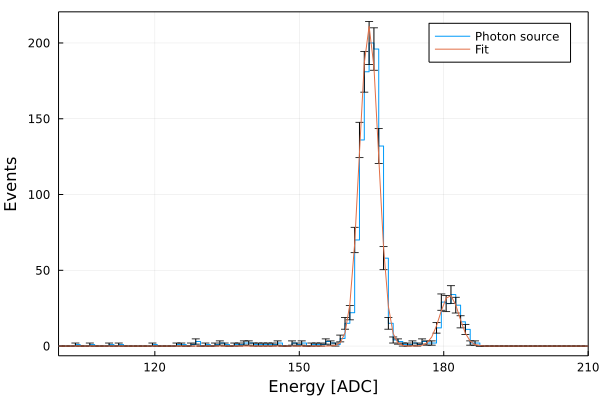

In [83]:
plot(bin_centers,yerr=y_error,observed_counts,xlims=(100,210),label="Photon source",st=:step,framestyle = :box,xlabel="Energy [ADC]",ylabel="Events",legend=:topright)
plot!(bin_centers,model(bin_centers, myfit_calibration.param),label="Fit")

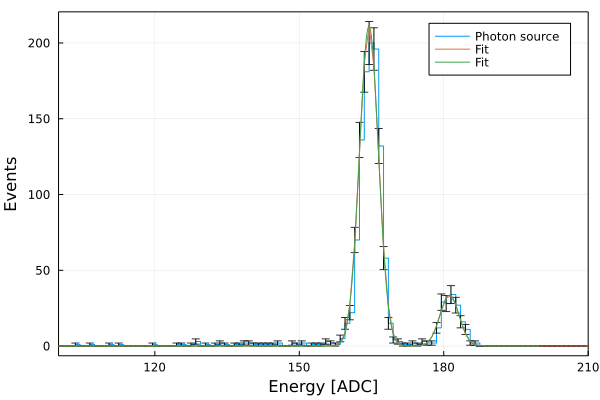

In [78]:
x_plot_bin = collect(0.0:0.1:200)
plot!(x_plot_bin,model(x_plot_bin, myfit.param),label="Fit")

In [79]:
Energy_main_x_Fe55 = 5.89
calibration_factor = myfit.param[2] / Energy_main_x_Fe55

27.92464588177155

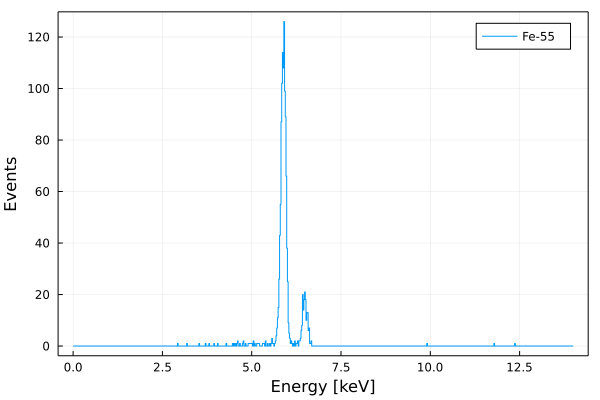

In [81]:
h_E_rec_keV = fit(Histogram, events_variables[:,1]/calibration_factor,0:0.02:14)
plot(h_E_rec_keV,label="Fe-55 ",st=:step,framestyle = :box,xlabel="Energy [keV]",ylabel="Events",legend=:topright)

## Homework

- Use the information of the rising time to implement remove events with long rising time 

- Compare the efect of removing these events

- What is the origin of such events? 

- Find the the calibration factors of all 8 channels available in data 

- Put in a same plot all calibrated histograms

- Check the effect of the peaking of the trapezoidal filter on the energy resolution

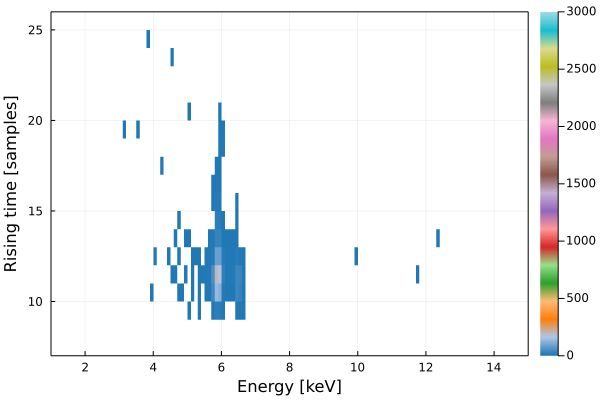

In [93]:
h2_E_t = fit(Histogram, (events_variables[:,1]/calibration_factor,events_variables[:,2]), closed=:left,(1:0.1:15,7:1:26))
plot(h2_E_t,framestyle = :box,label="",xlabel="Energy [keV]",clims=(0,3e3),
    c=cgrad(:tab20),ylabel="Rising time [samples]")

In [84]:
rising_t = events_variables[:,2]

1260-element Vector{Real}:
 14
 11
 11
 11
 10
 13
 11
 10
 10
 12
 10
 11
 10
  ⋮
 11
 15
 11
 13
 12
 11
  9
 13
 10
 12
 11
 12

In [90]:
events_variables[(events_variables[:,2].<15.), :]

1224×2 Matrix{Real}:
 164.24   14
 166.641  11
 165.201  11
 165.008  11
 163.397  10
 162.622  13
 163.729  11
 182.923  10
 161.799  10
 165.391  12
 162.88   10
 166.865  11
 163.061  10
   ⋮      
 180.079  10
 180.701  11
 163.98   11
 165.705  13
 166.412  12
 161.281  11
 179.835   9
 167.024  13
 162.684  10
 164.721  12
 167.603  11
 163.107  12